In [166]:
from keras.layers import Input, Dense, Reshape, TimeDistributed
from keras.models import Model
from keras.utils import plot_model
from IPython.display import Image

In [167]:
'''small encoder model'''
small_enc_input = Input(shape=(12,), name='small_encoder_input')
small_enc = Dense(2, name='bar_latent_space')(small_enc_input)
small_encoder = Model(small_enc_input, small_enc, name='small_encoder')

'''small decoder model'''
small_dec_input = Input(shape=(2,), name='small_decoder_input')
small_dec = Dense(12, name='bar_output')(small_dec_input)
small_decoder = Model(small_dec_input, small_dec, name='small_decoder')

In [168]:
'''small autoencoder model''' #It can be trained sepparetly
small_enc_input = Input(shape=(12,), name='small_autoencoder_input')
small_autoencoder_1 = small_encoder(small_enc_input)
small_autoencoder_2 = small_decoder(small_autoencoder_1)
small_autoencoder = Model(small_enc_input, small_autoencoder_2)

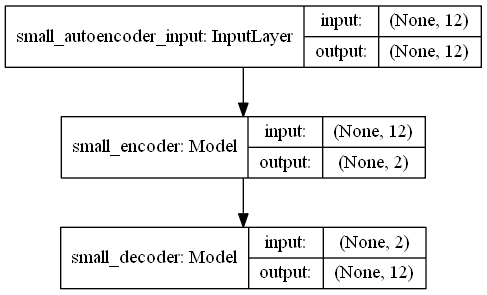

In [169]:
plot_model(small_autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

In [211]:
'''nested autoenoder model'''
enc_input = Input(shape=(4,12,), name='enc_input')
small_encoder_output = TimeDistributed(small_encoder, input_shape=(12,), name='wraped_1')(enc_input)
encoder_input = Reshape((8,))(small_encoder_output)
encoder = Dense(2)(encoder_input)
decoder = Dense(8)(encoder)
small_decoder_input = Reshape((4,2))(decoder)
small_decoder_output = TimeDistributed(small_decoder, input_shape=(2,), name='wraped_2')(small_decoder_input)


encoder_model = Model(enc_input, small_decoder_output)

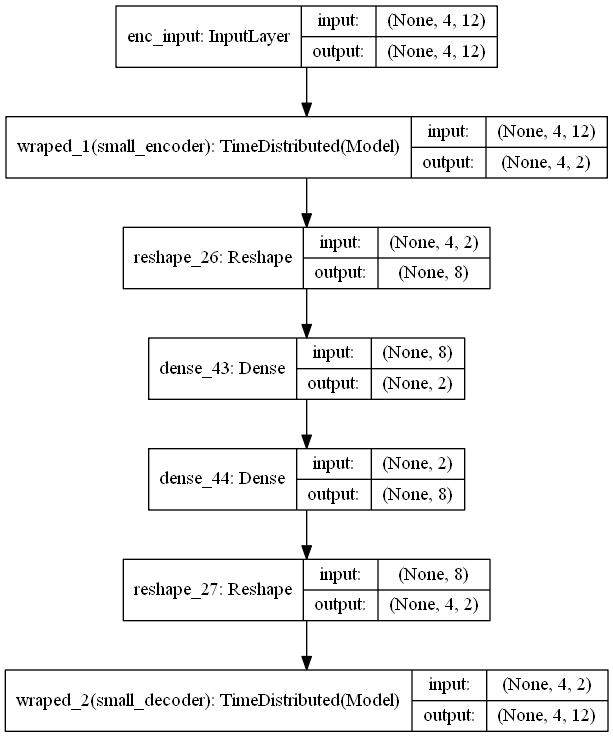

In [210]:
plot_model(encoder_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')